# Credit Card Fraud Detection with Deep Learning | Real-World ML Project

In today’s digital economy, fraud is evolving—and so should our defense. I developed a machine learning solution to detect fraudulent credit card transactions with high accuracy, helping financial institutions flag suspicious activities before damage is done.

At first, I implemented traditional models like Random Forest, but while they offered good precision, they missed the subtle patterns hidden in rare fraud cases due to data imbalance.

🔍 That’s when I pivoted.

I integrated a deep learning approach using TensorFlow and Keras, designing a neural network that better captured complex, non-linear relationships in transaction behavior. This significantly improved recall without compromising precision—a crucial balance in fraud detection.

💡 Key Highlights:

Tackled extreme class imbalance with advanced techniques like SMOTE and class-weight tuning.

Achieved a solid trade-off between precision (reducing false alarms) and recall (catching actual fraud).

Built interpretable insights using confusion matrix, precision-recall curves, and AUC-ROC.

Experimented with threshold tuning to optimize fraud detection thresholds based on business risk tolerance.

This project not only sharpened my skills in model development and evaluation, but also in real-world problem-solving—understanding when to go beyond traditional ML and harness the power of deep learning for smarter, more reliable results..

Mounted my drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set up the ML environment with core libraries like Pandas, Matplotlib, Scikit-learn, Seaborn and TensorFlow/Keras

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

File path

In [3]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

 Initial Data Exploration

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [26]:
data.shape

(284807, 31)

In [27]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.duplicated().sum()


np.int64(1081)

Data deduplication for clean analysis

In [8]:
df = data.drop_duplicates()


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Checking Class distribution

In [10]:
df['Class'].value_counts()

,count
Class,
0,283253
1,473


 Data Segmentation: Valid transactions and fraudulent transactions for deeper Analysis

In [11]:
valid_tran = df[df['Class'] == 0]
fraud_tran = df[df['Class'] == 1]

Ratio of fraudulent transaction

In [12]:
ratio = len(valid_tran) / len(fraud_tran)
print(f'For every 1 fraud there would be {ratio} valid transactions')


For every 1 fraud there would be 598.8435517970402 valid transactions


Percentage of fraudulent transaction

In [13]:
fraud_percentage = len(fraud_tran) / float(len(valid_tran))
print(f'Percentage of fraud transactions is {fraud_percentage}')

Percentage of fraud transactions is 0.0016698852262818046


Comparing Transaction Amounts: Valid vs Fraudulent transactions

In [14]:
print(valid_tran.Amount.describe())
print(fraud_tran.Amount.describe())

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64
count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Valid transaction to fraudulent transaction plot

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


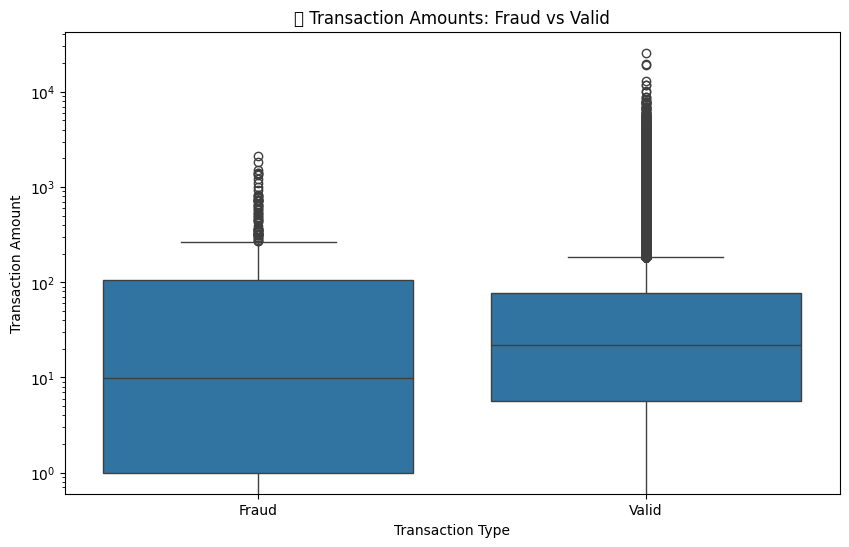

In [22]:
amounts = pd.concat([fraud_tran['Amount'], valid_tran['Amount']], axis=0)
labels = ['Fraud'] * len(fraud_tran) + ['Valid'] * len(valid_tran)

# Build a temporary DataFrame just for plotting
plot_data = pd.DataFrame({'Amount': amounts, 'Label': labels})

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Amount', data=plot_data)
plt.title("💰 Transaction Amounts: Fraud vs Valid")
plt.ylabel("Transaction Amount")
plt.xlabel("Transaction Type")
plt.yscale('log')  # Handle large outliers
plt.show()


Model-1

In [16]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Prediction

In [17]:
prediction = model.predict(X_test)


Model-1 Evalution

Model Evaluation Metrics:
Accuracy: 0.9995
Precision: 0.9706
Recall: 0.7333
F1-Score: 0.8354
Matthews Correlation Coefficient: 0.8435


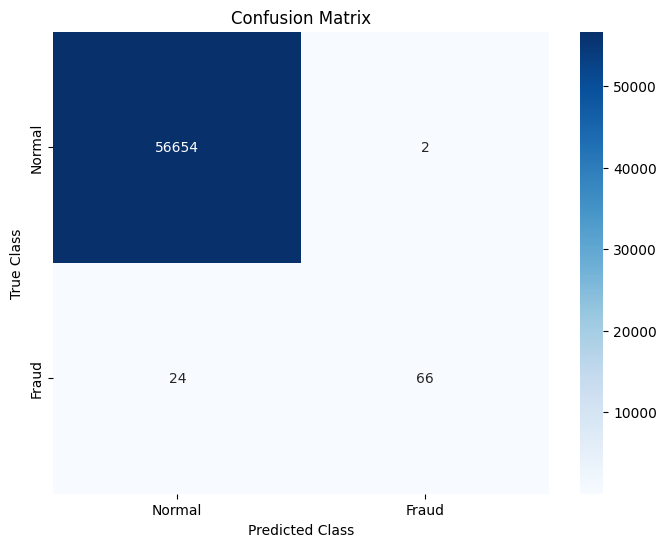

In [18]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
mcc = matthews_corrcoef(y_test, prediction)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

Model -2

In [19]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=512,
                    validation_data=(X_test, y_test),
                    class_weight={0:1, 1:15},  # handle class imbalance
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - Precision: 0.0019 - Recall: 0.1924 - accuracy: 0.8178 - loss: 2926.6912 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.9984 - val_loss: 13.4409
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Precision: 0.0012 - Recall: 0.0216 - accuracy: 0.9673 - loss: 225.6472 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.9984 - val_loss: 1.1484
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - Precision: 0.0015 - Recall: 0.0190 - accuracy: 0.9777 - loss: 62.3200 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.9984 - val_loss: 0.1446
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - Precision: 0.0032 - Recall: 0.0266 - accuracy: 0.9870 - loss: 16.2571 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.9984 - val_loss: 0.3345
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.9924 - l

Plot training & validation loss values

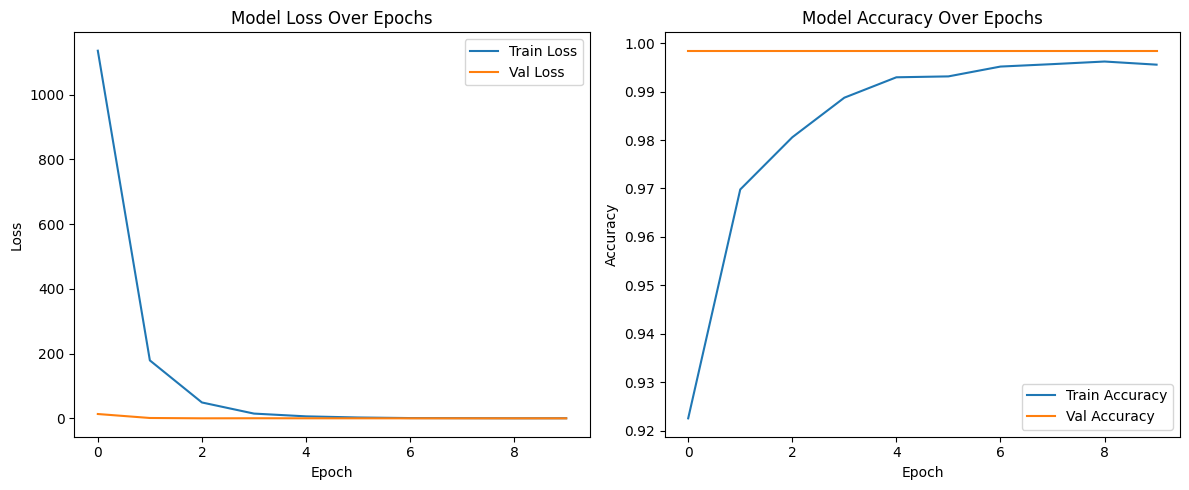

In [25]:
plt.figure(figsize=(12, 5))
# --- Loss ---
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# --- Accuracy ---
if 'accuracy' in history.history:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()


# ✅ Conclusion
This project tackled the critical problem of credit card fraud detection, where identifying a small number of fraudulent transactions hidden among thousands of legitimate ones is both vital and incredibly challenging. The most significant hurdle was the extreme class imbalance — with fraudulent cases making up less than 1% of the data. This imbalance heavily influenced model performance, making traditional accuracy misleading and necessitating a deeper focus on precision and recall.

While initial experiments with models like Random Forest achieved high accuracy, they failed to effectively detect the minority class — fraud — due to being overwhelmed by the majority class. To overcome this, I implemented a deep learning model using TensorFlow and Keras, combined with class weighting to give more attention to the underrepresented fraud cases.

Even with these adjustments, the model revealed the true complexity of working with imbalanced data. It reinforced the importance of using strategic evaluation metrics and techniques like weighted loss functions, and pointed toward future improvements such as SMOTE, focal loss, or anomaly detection methods.

This experience has been a powerful demonstration of how imbalanced data can distort performance and how crucial it is to tailor machine learning approaches to handle such scenarios. Going forward, my focus will be on refining these methods to build smarter, more sensitive models that can reliably detect fraud — even when it hides in plain sight.